In [59]:
from LHR_tire_toolkit.MF52 import MF52

import matplotlib.pyplot as plt
import numpy as np

tire = MF52(tire_name="", file_path="../../src/_1_model_inputs/Modified_Round_8_Hoosier_R25B_16x7p5_10_on_7in_12psi_PAC02_UM2.tir")

# Dx, Dy curves

Description: $\mu$ vs $F_{z}$ (N)

In [60]:
FZ_arr = np.linspace(100, 2500, 1000)

mu_x_arr = []
mu_y_arr = []

for FZ in FZ_arr:
    mu_x, mu_y = tire.get_mu(FZ=FZ)

    mu_x_arr.append(mu_x)
    mu_y_arr.append(mu_y)

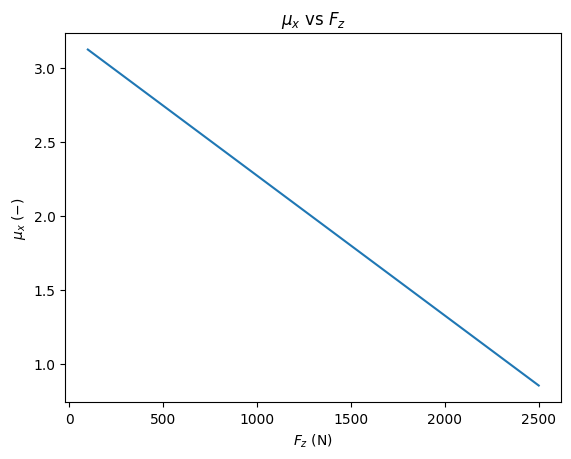

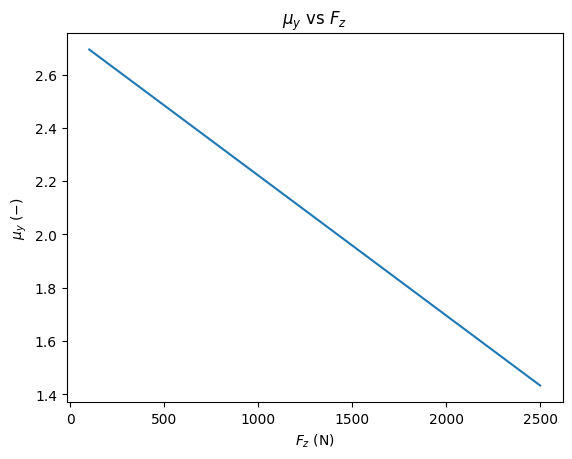

In [61]:
fig = plt.figure()
ax = fig.gca()

ax.set_title(r"$\mu_{x}$ vs $F_{z}$")
ax.set_xlabel(r"$F_{z}$ (N)")
ax.set_ylabel(r"$\mu_{x}$ $\left( - \right)$")
ax.plot(FZ_arr, mu_x_arr)
plt.show()

fig = plt.figure()
ax = fig.gca()

ax.set_title(r"$\mu_{y}$ vs $F_{z}$")
ax.set_xlabel(r"$F_{z}$ (N)")
ax.set_ylabel(r"$\mu_{y}$ $\left( - \right)$")
ax.plot(FZ_arr, mu_y_arr)
plt.show()

# LUT on Camber angle vs grip ratio

Tire starts vertically. This is the normalizing grip.

In [62]:
gamma_arr = np.linspace(-4, 0, 1000) * np.pi / 180

_, mu_y_0 = tire.get_mu(FZ=tire.get_FNOMIN(), gamma=0)

mu_y_arr = []

for gamma in gamma_arr:
    _, mu_y = tire.get_mu(FZ=tire.get_FNOMIN(), gamma=gamma)

    mu_y_arr.append(mu_y)

grip_ratio = [mu_y / mu_y_0 for mu_y in mu_y_arr]

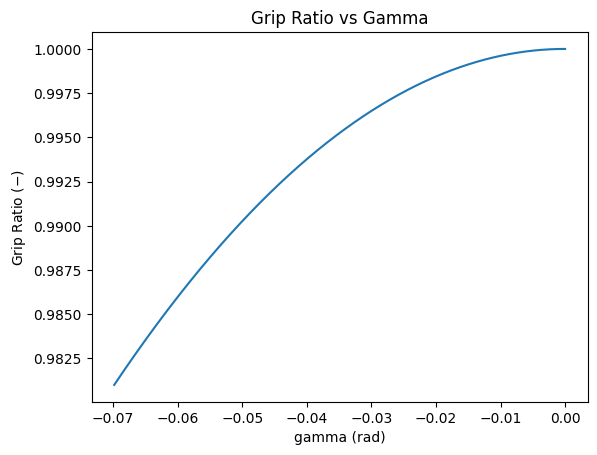

In [63]:
fig = plt.figure()
ax = fig.gca()

ax.set_title(r"Grip Ratio vs Gamma")
ax.set_xlabel(r"gamma (rad)")
ax.set_ylabel(r"Grip Ratio $\left( - \right)$")
ax.plot(gamma_arr, grip_ratio)
plt.show()

# Rolling Resistance Fit

rolling resistance force = $R_{y0} \times \frac{F_{z}}{1000}$

$R_{\alpha} = \left. \frac{d M_{y}}{d \kappa} \right|_{F_{z} = F_{0}}$

In [64]:
FZ_arr = np.linspace(100, 2500, 1000)

My_arr = []

for FZ in FZ_arr:
    _, _, _, _, My, _ = tire.tire_eval(FZ=FZ, alpha=0, kappa=0, gamma=0)

    My_arr.append(My)

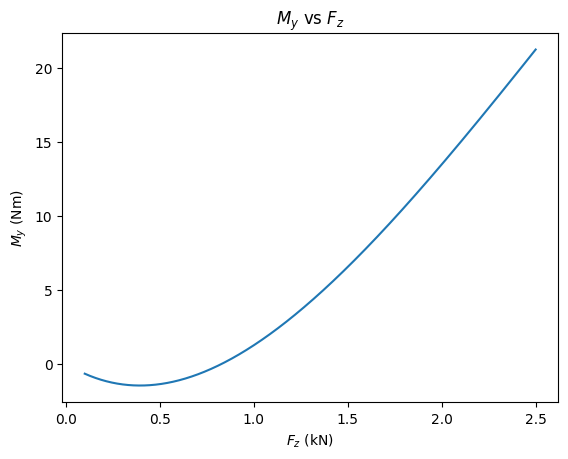

In [65]:
fig = plt.figure()
ax = fig.gca()

ax.set_title(r"$M_{y}$ vs $F_{z}$")
ax.set_xlabel(r"$F_{z}$ (kN)")
ax.set_ylabel(r"$M_{y}$ (Nm)")
ax.plot(FZ_arr / 1000, My_arr)
plt.show()